# Recommendation Systems

In [1]:
#importing required libraries
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style='whitegrid')
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore")
plt.rcParams['figure.figsize'] = (15, 6)

### Loading the Dataset and Basic Analysis

In [2]:
#loading the dataset
movies = pd.read_fwf('zee-movies.dat',encoding='latin-1')
ratings = pd.read_fwf('zee-ratings.dat',encoding = 'ISO-8859-1')
users = pd.read_fwf('zee-users.dat',encoding = 'ISO-8859-1')

In [3]:
movies.head(2)

,Movie ID::Title::Genres,Unnamed: 1,Unnamed: 2
0,1::Toy Story (1995)::Animation|Children's|Comedy,NaN,NaN
1,2::Jumanji (1995)::Adventure|Children's|Fantasy,NaN,NaN


In [4]:
# Dropping the unnecessary columns
movies.drop(columns=['Unnamed: 1','Unnamed: 2'],inplace=True)

# Formatting the data based on Delimeter
delimeter = "::"
movies = movies['Movie ID::Title::Genres'].str.split(delimeter,expand=True)
movies.columns = ['MovieID','Title','Genres']

In [5]:
# Top 5 rows of movies dataset

movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
movies.shape

(3883, 3)

- Movies dataset have 3883 rows and 3 columns - MovieID, Title, Genres

In [7]:
# Statistical Summary of data

movies.describe()

,MovieID,Title,Genres
count,3883,3883,3858
unique,3883,3883,360
top,1,Toy Story (1995),Drama
freq,1,1,830


**Insights:**

- MovieID and Title doesn't have any duplicates.
- Number of unique Genres are 360 (can be only 1 or combination of few)
- Genre with highest number of Movies is **Drama**, which is for 830 rows/movies

In [8]:
# Basic Information 
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   MovieID  3883 non-null   object
 1   Title    3883 non-null   object
 2   Genres   3858 non-null   object
dtypes: object(3)
memory usage: 91.1+ KB


- From above, we can detect the presence of outliers in Genres column

In [9]:
for i in movies.columns:
    print(f'Number of unique values in {i}:{movies[i].nunique()}')

Number of unique values in MovieID:3883
Number of unique values in Title:3883
Number of unique values in Genres:360


In [10]:
# Top 10 Genres

movies.Genres.value_counts().sort_values(ascending=False)[:10]

Drama             830
Comedy            518
Horror            172
Comedy|Drama      159
Comedy|Romance    136
Drama|Romance     128
Documentary       106
Thriller          101
Action             65
Drama|Thriller     63
Name: Genres, dtype: int64

Top Genres include  

    - Drama  (830 movies) 
    - Comedy (518 movies) 
    - Horror (172 movies)

In [11]:
# Bottom 10 Genres

movies.Genres.value_counts().sort_values(ascending=True)[:188]

Drama|Horror|Thriller                            1
Drama|Romance|Western                            1
Action|Horror|Thriller                           1
Animation|Mystery                                1
Animation|Children                               1
                                                ..
Children's|Horror                                1
Adventure|Animation|Children's|Sci               1
Action|Sci-Fi|Thriller|Western                   1
Children's|Sci-Fi                                1
Adventure|Animation|Children's|Comedy|Musical    1
Name: Genres, Length: 188, dtype: int64

- There are 188 Genres where number of movies = 1

In [12]:
# Ratings Dataset

ratings.head()

,UserID::MovieID::Rating::Timestamp
0,1::1193::5::978300760
1,1::661::3::978302109
2,1::914::3::978301968
3,1::3408::4::978300275
4,1::2355::5::978824291


In [13]:
# Formatting Data based on delimeter

delimeter = "::"
ratings = ratings['UserID::MovieID::Rating::Timestamp'].str.split(delimeter,expand=True)
ratings.columns = ['UserID','MovieID','Rating','Timestamp']

# Top 5 rows
ratings.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [14]:
ratings.shape

(1000209, 4)

- Ratings has 1000209 rows with 4 columns - UserID, MovieID, Rating, Timestamp

In [15]:
# Statistical Summary

ratings.describe()

,UserID,MovieID,Rating,Timestamp
count,1000209,1000209,1000209,1000209
unique,6040,3706,5,458455
top,4169,2858,4,975528402
freq,2314,3428,348971,30


**Insights:**

- Unique users indataset are 6040
- User with ID:4169 has given highest number of ratings with 2314
- Unique Movies in dataset are 3706
- Movie with ID:2858 with highest number of ratings at 3428
- Rating 4 was given highest by 348971 times

In [16]:
# Basic Information 

ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  object
 1   MovieID    1000209 non-null  object
 2   Rating     1000209 non-null  object
 3   Timestamp  1000209 non-null  object
dtypes: object(4)
memory usage: 30.5+ MB


- From above, we can say there are no NULL values in ratings dataset

In [17]:
for i in ratings.columns:
    print(f'Number of unique values in {i}:{ratings[i].nunique()}')

Number of unique values in UserID:6040
Number of unique values in MovieID:3706
Number of unique values in Rating:5
Number of unique values in Timestamp:458455


In [18]:
ratings.Rating.value_counts()

4    348971
3    261197
5    226310
2    107557
1     56174
Name: Rating, dtype: int64

**Insights:**

- Rating 4 was given for most number of times: 348971, followed by 3:261197
- Rating 1 was given for least number of times: 56174 

In [19]:
# Top 10 users who provided most ratings

ratings.UserID.value_counts().sort_values(ascending = False)[:10]

4169    2314
1680    1850
4277    1743
1941    1595
1181    1521
889     1518
3618    1344
2063    1323
1150    1302
1015    1286
Name: UserID, dtype: int64

- User 4169 gave highest number of ratings for 2314 times, followed by user 1680 and 4277

In [20]:
# Top 10 users who provided most ratings

ratings.UserID.value_counts().sort_values(ascending = True)[:10]

3021    20
4628    20
2111    20
5525    20
1406    20
5380    20
4178    20
2696    20
3291    20
4068    20
Name: UserID, dtype: int64

- User 3021 and few others gave lowest number of ratings, just 20 times

In [21]:
# Top 10 movie IDs which received most ratings

ratings.MovieID.value_counts().sort_values(ascending = False)[:10]

2858    3428
260     2991
1196    2990
1210    2883
480     2672
2028    2653
589     2649
2571    2590
1270    2583
593     2578
Name: MovieID, dtype: int64

-  MovieID: 2858 received highest number of ratings fro 3428 times followed by 260 and 1196 with 2991 and 2990 times

In [22]:
# Top 10 movie IDs which received lowest number of ratings

ratings.MovieID.value_counts().sort_values(ascending = True)[:10]

2909    1
3382    1
1843    1
1316    1
868     1
3656    1
133     1
286     1
3530    1
3290    1
Name: MovieID, dtype: int64

- MovieID: 2909 and few others received lowest number of ratings with only one rating

In [23]:
users.head()

,UserID::Gender::Age::Occupation::Zip-code
0,1::F::1::10::48067
1,2::M::56::16::70072
2,3::M::25::15::55117
3,4::M::45::7::02460
4,5::M::25::20::55455


In [24]:
# Formatting the users dataset with delimeter

delimeter = "::"
users = users['UserID::Gender::Age::Occupation::Zip-code'].str.split(delimeter,expand=True)
users.columns = ['UserID','Gender','Age','Occupation','Zip-code']

# Top 5 rows of users dataset
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [25]:
users.shape

(6040, 5)

- Users dataset is of 6040 rows with 5 columns - UserId, Gender, Age, Occupation,Zip-code

In [26]:
# Statistical Summary of users dataset

users.describe()

,UserID,Gender,Age,Occupation,Zip-code
count,6040,6040,6040,6040,6040
unique,6040,2,7,21,3439
top,1,M,25,4,48104
freq,1,4331,2096,759,19


**Insights**:

  - Most of the users are male (4331 out of 6040)
  - Number of people in age group 25-34 are highest (2096 out of 6040)
  - Number of people with Occupation as 4 are highest (759 out of 6040)

In [27]:
# Basic Information of users dataset 

users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6040 entries, 0 to 6039
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   UserID      6040 non-null   object
 1   Gender      6040 non-null   object
 2   Age         6040 non-null   object
 3   Occupation  6040 non-null   object
 4   Zip-code    6040 non-null   object
dtypes: object(5)
memory usage: 236.1+ KB


- From above, we can see there are no outliers present in the data

In [28]:
# Counts for each gender

users.Gender.value_counts(normalize=True)*100

M    71.705298
F    28.294702
Name: Gender, dtype: float64

- 71.7 % of users are Male and 28.3% of users are Female

In [29]:
users.Age.value_counts()

25    2096
35    1193
18    1103
45     550
50     496
56     380
1      222
Name: Age, dtype: int64

**Points**

  - Users in the age group 25-34 are the highest (2096), followed by 35-44 (1193),closely followed by 18-24 (1103)
  - Least number of users are below 18 years (222)

In [30]:
# Top 5 occupations

users.Occupation.value_counts().sort_values(ascending=False)[:6]

4     759
0     711
7     679
1     528
17    502
12    388
Name: Occupation, dtype: int64

In [31]:
# Occupations with lowest number of users

users.Occupation.value_counts().sort_values(ascending=True)[:5]

8      17
18     70
19     72
9      92
5     112
Name: Occupation, dtype: int64

**Points:**
    
  - 5 Occupations with highest number of users: 4,7,1,17,12 (0 is not counted as it denotes Other)
  - 5 Occupations with least number of users: 8,18,19,9,5

### Merge the Data

In [32]:
# Merge the movies and ratings dataset on MovieID column

df_mr = pd.merge(movies,ratings,left_on='MovieID',right_on='MovieID',how='inner')
df_mr.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [33]:
# Merge the users and above merged movie-ratings dataframe

df = pd.merge(df_mr,users,on='UserID',how='inner')

In [34]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantas,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


In [35]:
df.shape

(1000209, 10)

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   MovieID     1000209 non-null  object
 1   Title       1000209 non-null  object
 2   Genres      996144 non-null   object
 3   UserID      1000209 non-null  object
 4   Rating      1000209 non-null  object
 5   Timestamp   1000209 non-null  object
 6   Gender      1000209 non-null  object
 7   Age         1000209 non-null  object
 8   Occupation  1000209 non-null  object
 9   Zip-code    1000209 non-null  object
dtypes: object(10)
memory usage: 83.9+ MB


In [37]:
df.isna().sum()

MovieID          0
Title            0
Genres        4065
UserID           0
Rating           0
Timestamp        0
Gender           0
Age              0
Occupation       0
Zip-code         0
dtype: int64

- Only Genres column have the Null vaulues (4065 rows)
- No other column has NULL values

## Feature Engineering

In [38]:
# Age,Rating should be int
df['Age'] = df['Age'].astype('int32')
df['Rating'] = df['Rating'].astype('int32')

# Timestamp should be datetime
df['Timestamp'] = pd.to_datetime(df['Timestamp'],unit='s')

In [39]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,2001-01-06 23:39:11,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,2000-12-31 22:29:37,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantas,1,4,2000-12-31 22:12:40,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,2001-01-06 23:36:35,F,1,10,48067


In [40]:
#Extract release Year from Title

df['ReleaseYear'] = df['Title'].str.rsplit(" ",1).str[1].str.lstrip('(').str.rstrip(')')
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,F,1,10,48067,1995
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,2001-01-06 23:39:11,F,1,10,48067,1995
2,150,Apollo 13 (1995),Drama,1,5,2000-12-31 22:29:37,F,1,10,48067,1995
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantas,1,4,2000-12-31 22:12:40,F,1,10,48067,1977
4,527,Schindler's List (1993),Drama|War,1,5,2001-01-06 23:36:35,F,1,10,48067,1993


In [41]:
# Extract Title or remove Release year from Title column

df['Title'] = df['Title'].str.rsplit(' ',1).str[0]
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear
0,1,Toy Story,Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,F,1,10,48067,1995
1,48,Pocahontas,Animation|Children's|Musical|Romance,1,5,2001-01-06 23:39:11,F,1,10,48067,1995
2,150,Apollo 13,Drama,1,5,2000-12-31 22:29:37,F,1,10,48067,1995
3,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantas,1,4,2000-12-31 22:12:40,F,1,10,48067,1977
4,527,Schindler's List,Drama|War,1,5,2001-01-06 23:36:35,F,1,10,48067,1993


In [42]:
# Replace Age with Age Groups

df.replace({'Age':{1: "Under 18",
                   18:"18-24",
                   25:"25-34",
                   35:"35-44",
                   45:"45-49",
                   50:"50-55",
                   56:"56+"}},inplace=True)

In [43]:
# replace Occupation with each category

df.replace({'Occupation':{'0': "other" or not specified,
                          '1': "academic/educator",
                          '2': "artist",
                          '3': "clerical/admin",
                          '4': "college/grad student",
                          '5': "customer service",
                          '6': "doctor/health care",
                          '7': "executive/managerial",
                          '8': "farmer",
                          '9': "homemaker",
                          '10': "K-12 student",
                          '11': "lawyer",
                          '12': "programmer",
                          '13': "retired",
                          '14': "sales/marketing",
                          '15': "scientist",
                          '16': "self-employed",
                          '17': "technician/engineer",
                          '18': "tradesman/craftsman",
                          '19': "unemployed",
                          '20': "writer"

}},inplace=True)

In [44]:
df.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear
0,1,Toy Story,Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,F,Under 18,K-12 student,48067,1995
1,48,Pocahontas,Animation|Children's|Musical|Romance,1,5,2001-01-06 23:39:11,F,Under 18,K-12 student,48067,1995
2,150,Apollo 13,Drama,1,5,2000-12-31 22:29:37,F,Under 18,K-12 student,48067,1995
3,260,Star Wars: Episode IV - A New Hope,Action|Adventure|Fantas,1,4,2000-12-31 22:12:40,F,Under 18,K-12 student,48067,1977
4,527,Schindler's List,Drama|War,1,5,2001-01-06 23:36:35,F,Under 18,K-12 student,48067,1993


In [45]:
df.ReleaseYear.unique()

array(['1995', '1977', '1993', '1992', '1937', '1991', '1996', '1964',
       '1939', '1958', '1950', '1941', '1965', '1982', '1975', '1987',
       '1962', '1989', '1985', '1959', '1997', '1998', '1988', '1942',
       '1947', '1999', '1980', '1983', '1986', '1990', '2000', '1964):',
       '1994', '1978', '1961', '1984', '1972', '1976', '1981', '1973',
       '1974', '1940', 'Bo', '1952', '1954', '1953', '1944', '1968',
       '1957', '1946', '1949', '1951', '1963', '1971', '1979', '1967',
       '1966', '1948', '1933', '1970', '1969', '1930', '1955', '1956', '',
       '1920', '1925', '1938', '195', '1960', '1935', '1932', '1931',
       '1945', '1943', '1981):', '1934', '1936', '1929', 'the', '1926',
       'Arta', 'B', '1927', '19', '1922', 'Polar', '1919', '1921', "d'A",
       '1923', '1989):', '1928', '1995):', 'prendront', '1'], dtype=object)

In [46]:
# Few Release Years have ')' at the end, which could be added by mistake, so replacing these with actual numbers

df['ReleaseYear'].replace(['1981):','1964):','1989):','1995):'],['1981','1964','1989','1995'],inplace=True)

In [47]:
#Release Year cannot be any string, so dropping the rows 

idx_val = df[(df['ReleaseYear'] == 'prendront') | 
   (df['ReleaseYear'] == 'Polar')|
   (df['ReleaseYear'] == 'Bo')|
   (df['ReleaseYear'] == 'Arta')|
   (df['ReleaseYear'] == 'B')|
   (df['ReleaseYear'] == "d'A")|
   (df['ReleaseYear'] == '19')|
   (df['ReleaseYear'] == '')|
   (df['ReleaseYear'] == 'the')|
   (df['ReleaseYear'] == '195')].index
df.drop(index=idx_val,inplace=True)


In [48]:
df.ReleaseYear.nunique()

82

- There are 82 unique years in the dataset

In [49]:
print(f'Shape of Dataset after removing rows with Release Years having text: {df.shape}')

Shape of Dataset after removing rows with Release Years having text: (997640, 11)


In [50]:
# Basic Info

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 997640 entries, 0 to 1000208
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   MovieID      997640 non-null  object        
 1   Title        997640 non-null  object        
 2   Genres       996144 non-null  object        
 3   UserID       997640 non-null  object        
 4   Rating       997640 non-null  int32         
 5   Timestamp    997640 non-null  datetime64[ns]
 6   Gender       997640 non-null  object        
 7   Age          997640 non-null  object        
 8   Occupation   997640 non-null  object        
 9   Zip-code     997640 non-null  object        
 10  ReleaseYear  997640 non-null  object        
dtypes: datetime64[ns](1), int32(1), object(9)
memory usage: 87.5+ MB


In [51]:
# Statistical Summary of Release Year
df['ReleaseYear'].describe()

count     997640
unique        82
top         1999
freq       86833
Name: ReleaseYear, dtype: object

- Movies released in year 1999 has got most ratings

In [52]:
# TO find the distribution of Year
df['ReleaseYear'].astype(int).describe()

count    997640.000000
mean       1986.754369
std          14.444808
min           1.000000
25%        1982.000000
50%        1992.000000
75%        1997.000000
max        2000.000000
Name: ReleaseYear, dtype: float64

## Exploratory Data Analysis 

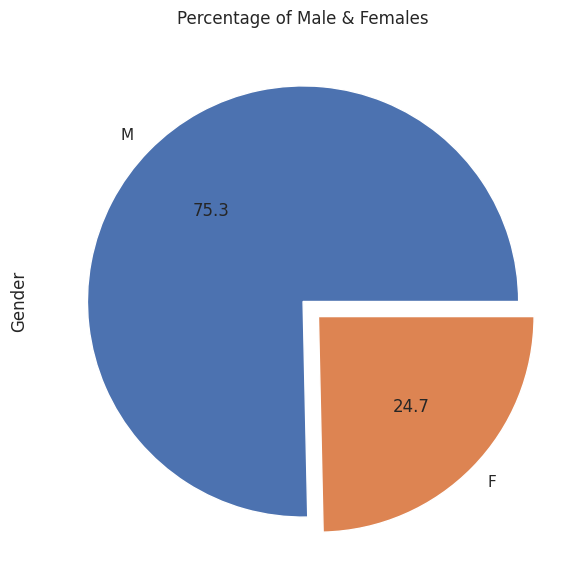

In [53]:
df['Gender'].value_counts().plot(kind='pie',figsize=(7,7),autopct='%1.1f',explode=[0,0.1])
plt.title('Percentage of Male & Females')
plt.show()

- Male constitute 75.3% of data
- Females constitue 24.7% of data

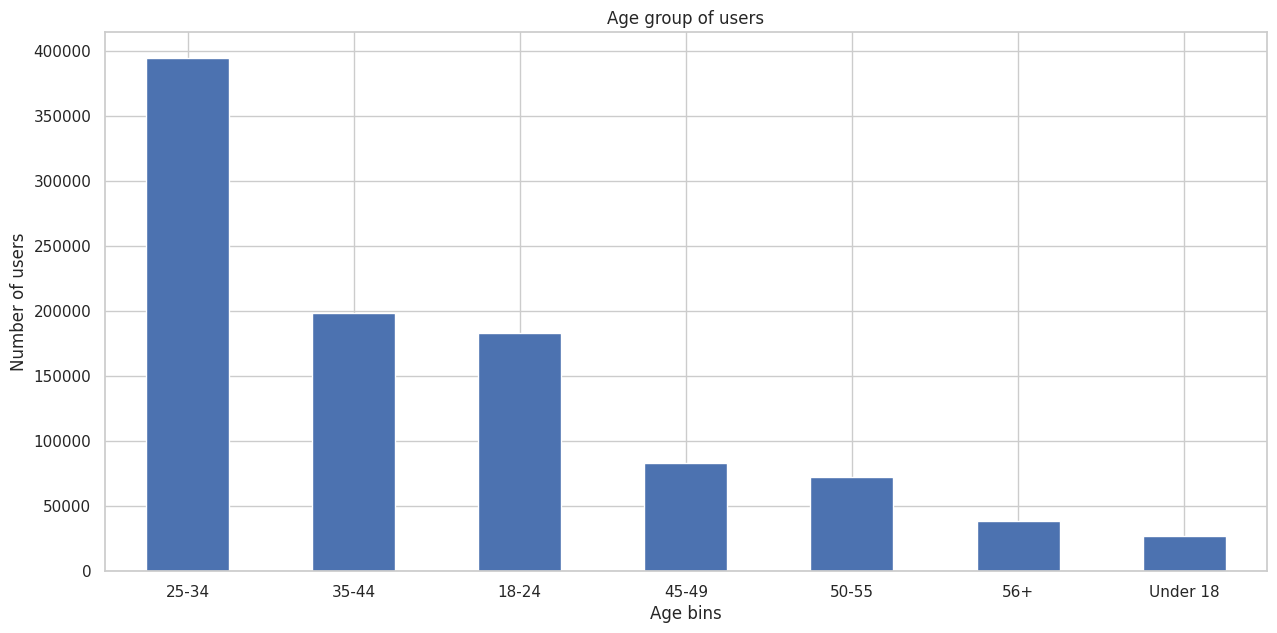

In [54]:
df['Age'].value_counts().plot(kind='bar',figsize=(15,7))
plt.title('Age group of users')
plt.xlabel('Age bins')
plt.xticks(rotation = 360)
plt.ylabel('Number of users')
plt.show()

- Ratings from Users in the age group 25-34 are the highest, followed by 35-44,closely followed by 18-24
- Least number of ratings are from users who are below 18 years

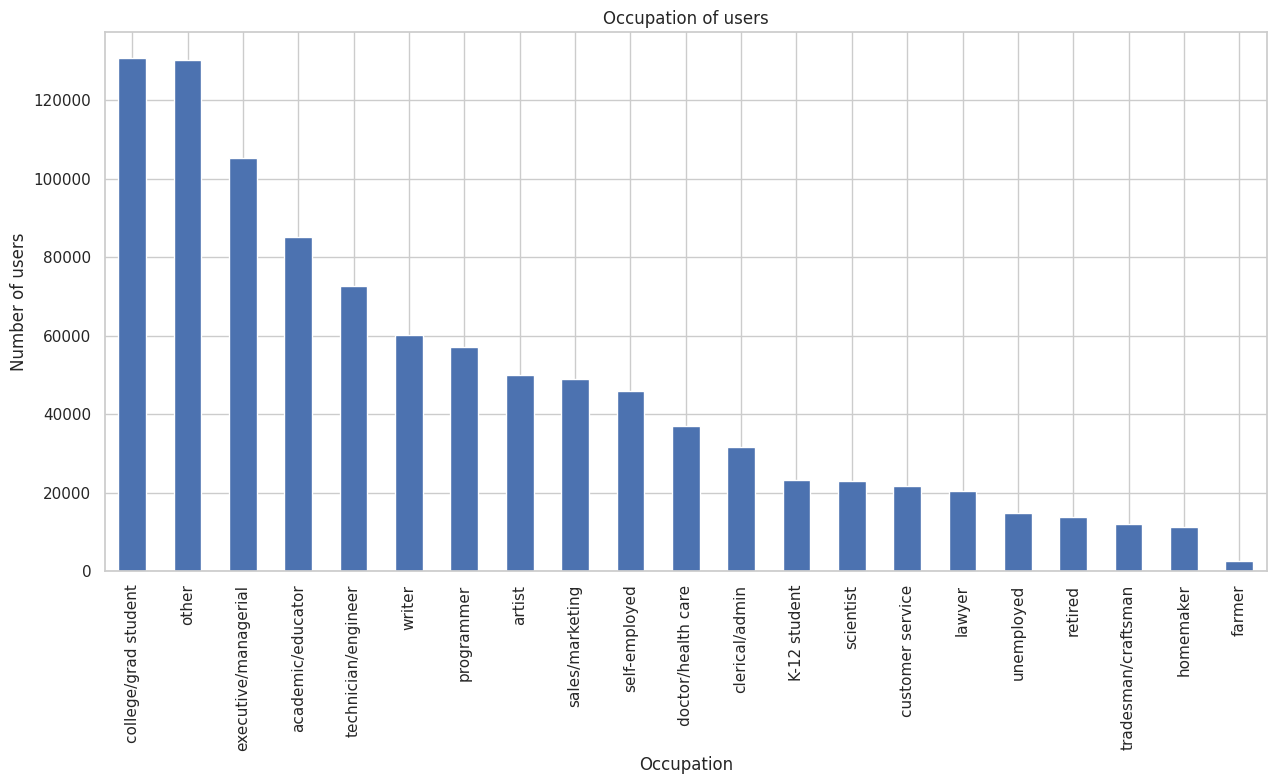

In [55]:
df['Occupation'].value_counts().plot(kind='bar',figsize=(15,7))
plt.title('Occupation of users')
plt.xlabel('Occupation')
plt.ylabel('Number of users')
plt.show()

- Most of the ratings are submitted by college/grad Student followed by Executive/Managerial people (which is quite a surprise)
- Least number of ratings are submitted by Farmer (which is expected) followed by Homemakers and Tradesman/craftsmen

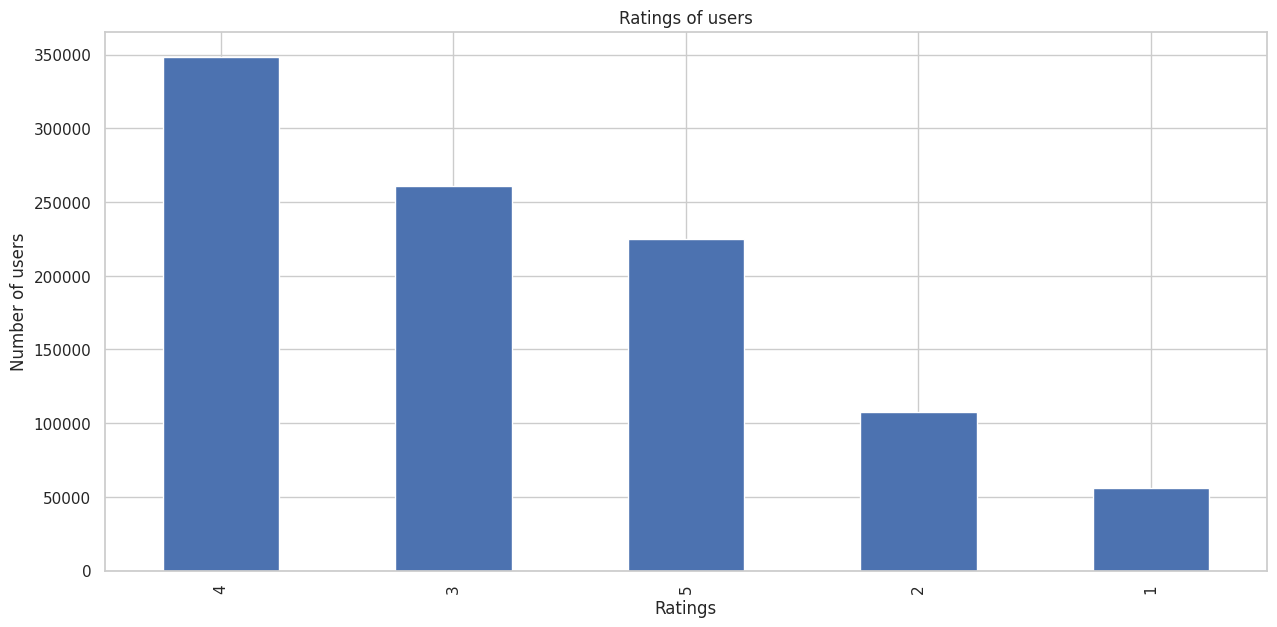

In [56]:
df['Rating'].value_counts().plot(kind='bar',figsize=(15,7))
plt.title('Ratings of users')
plt.xlabel('Ratings')
plt.ylabel('Number of users')
plt.show()

- Rating 4 was given the highest followed by 3
- Rating 1 was given least

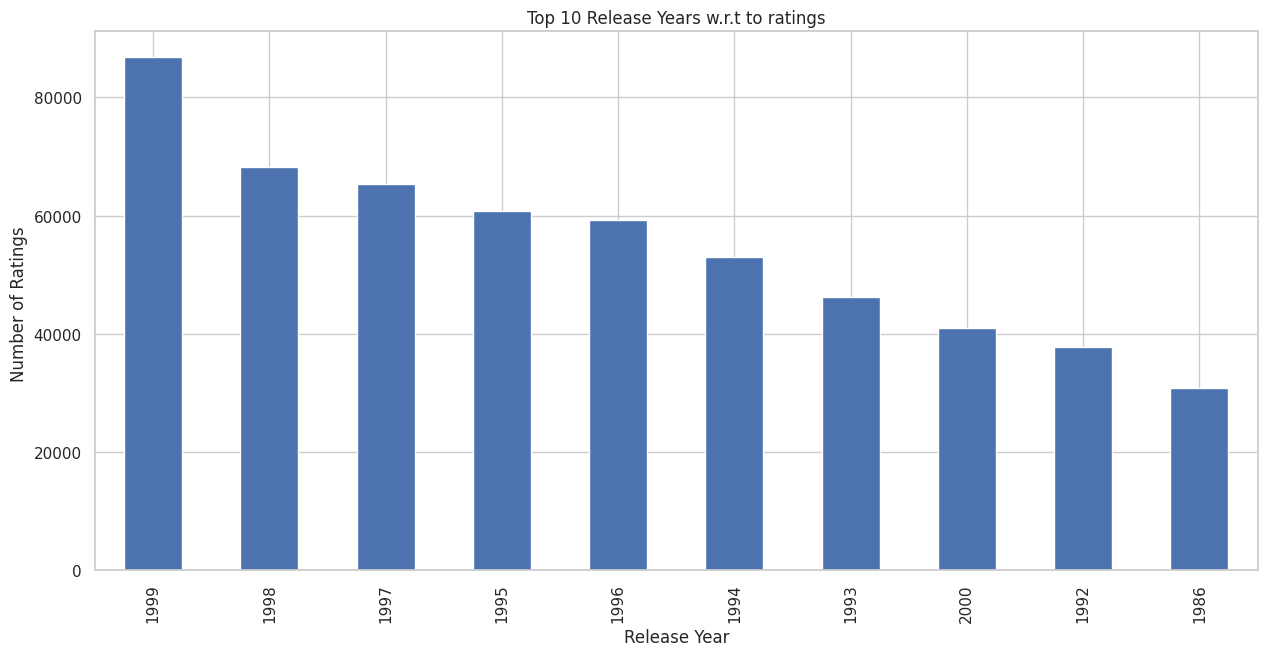

In [57]:
df['ReleaseYear'].value_counts().sort_values(ascending=False).head(10).plot(kind='bar',figsize=(15,7))
plt.title('Top 10 Release Years w.r.t to ratings')
plt.xlabel('Release Year')
plt.ylabel('Number of Ratings ')
plt.show()

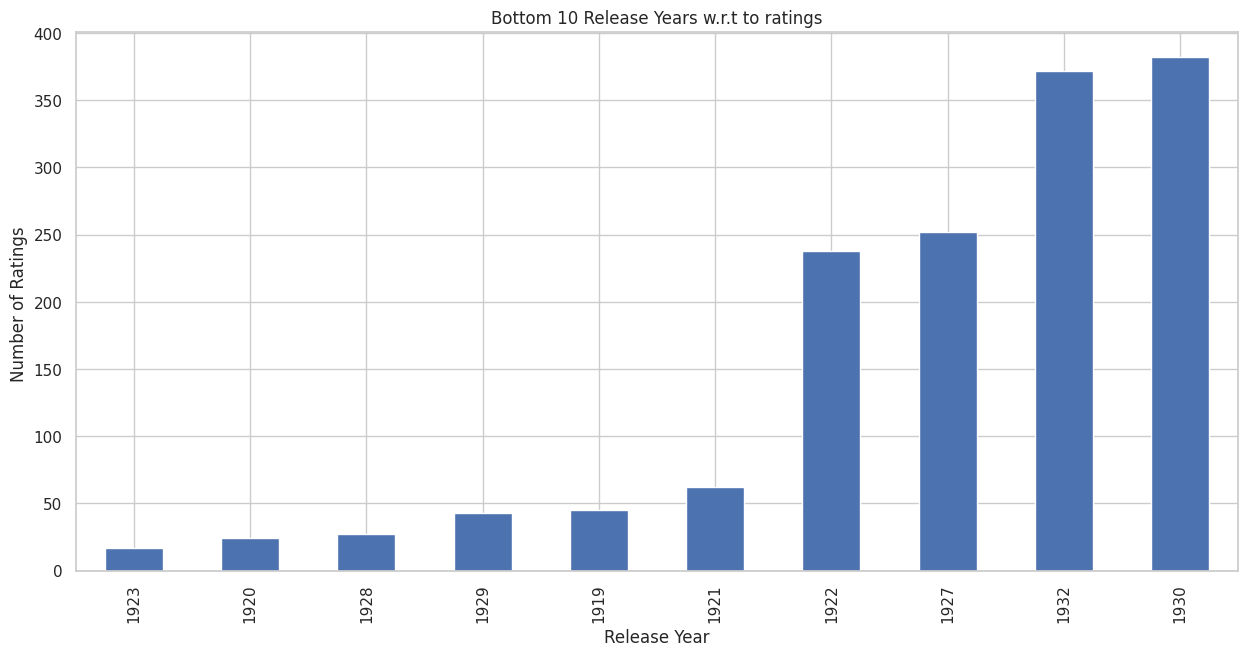

In [58]:
df['ReleaseYear'].value_counts().sort_values(ascending=True)[1:11].plot(kind='bar',figsize=(15,7))
plt.title('Bottom 10 Release Years w.r.t to ratings')
plt.xlabel('Release Year')
plt.ylabel('Number of Ratings ')
plt.show()

- Years 1993-1997 / Decade 1990-2000 has received the highest number of ratings.
- Years 1920-1924 /Decade 1920-30 received the lowest number of ratings

In [59]:
# Missing Values
def missing_values(df):
    total_null = df.isnull().sum().sort_values(ascending  = False)
    percent_null = ((df.isnull().sum()/df.shape[0])*100).sort_values(ascending = False)
    print(f"Total records in our data =  {df.shape[0]} where missing values are as follows:")
    missing_data = pd.concat([total_null, percent_null.round(2)], axis = 1,keys=['Total Missing','In Percent'])
    return missing_data

In [60]:
missing_values(df)

Total records in our data =  997640 where missing values are as follows:


,Total Missing,In Percent
Genres,1496,0.15
MovieID,0,0.00
Title,0,0.00
UserID,0,0.00
Rating,0,0.00
Timestamp,0,0.00
Gender,0,0.00
Age,0,0.00
Occupation,0,0.00
Zip-code,0,0.00


- Genre has missing values which account for 0.15% of total records

In [61]:
df[df.duplicated()]

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear


- No duplicates are found in the dataset 

## Data Aggregation

In [62]:
#Create a dataframe  with Title and Average Rating

df_titlerating = df.groupby('Title')['Rating'].mean().sort_values(ascending=False).to_frame().reset_index().rename(columns={'Rating':'Average Rating'})

In [63]:
df_titlerating.head()

,Title,Average Rating
0,Follow the Bitch,5.0
1,Bittersweet Motel,5.0
2,Schlafes Bruder (Brother of Sleep),5.0
3,Smashing Time,5.0
4,Lured,5.0


In [64]:
#Create a dataframe with Title and Number of Ratings

df_titlecount = df.groupby('Title')['Rating'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns={'Rating':'Count'})

In [65]:
df_titlecount.head()

,Title,Count
0,American Beauty,3428
1,Star Wars: Episode IV - A New Hope,2991
2,Star Wars: Episode V - The Empire Strikes Back,2990
3,Star Wars: Episode VI - Return of the Jedi,2883
4,Jurassic Park,2672


In [66]:
df_final = pd.merge(df_titlerating,df_titlecount,on='Title')

In [67]:
df_final.head()

,Title,Average Rating,Count
0,Follow the Bitch,5.0,1
1,Bittersweet Motel,5.0,1
2,Schlafes Bruder (Brother of Sleep),5.0,1
3,Smashing Time,5.0,2
4,Lured,5.0,1


In [68]:
df_final['Average Rating'].describe()

count    3651.000000
mean        3.236098
std         0.674012
min         1.000000
25%         2.818448
50%         3.328571
75%         3.738459
max         5.000000
Name: Average Rating, dtype: float64

In [69]:
df_final.Count.describe()

count    3651.000000
mean      273.251164
std       388.093950
min         1.000000
25%        33.000000
50%       125.000000
75%       354.000000
max      3428.000000
Name: Count, dtype: float64

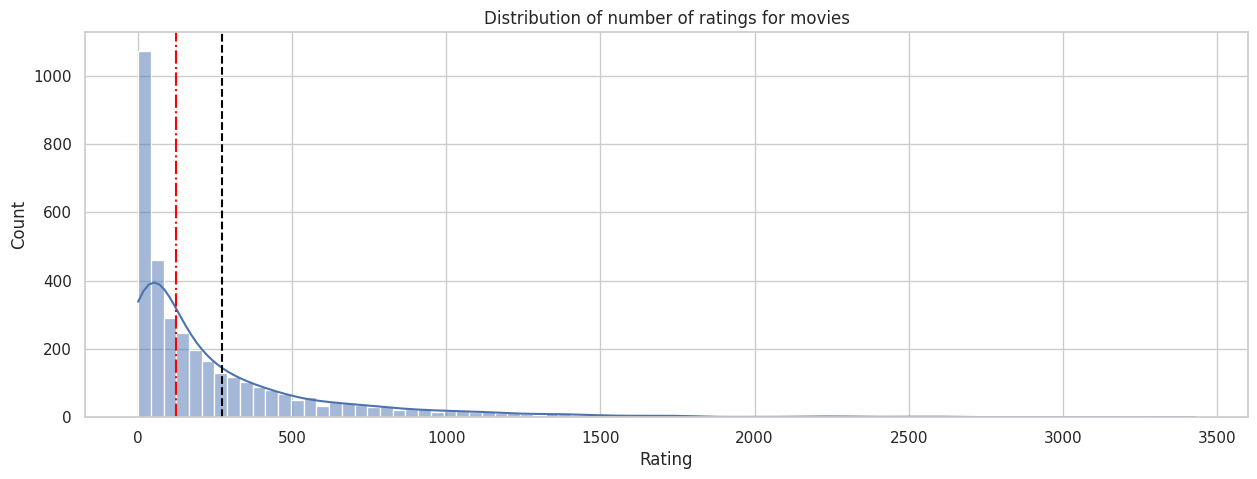

In [70]:
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111)
sns.histplot(df.groupby('Title')['Rating'].count(),kde=True)
ax.axvline(df.groupby('Title')['Rating'].count().mean(), color='black', linestyle='--',linewidth=1.5)
ax.axvline(df.groupby('Title')['Rating'].count().median(), color='red', linestyle='-.',linewidth=1.5)
ax.set_title("Distribution of number of ratings for movies")
plt.show()

In [71]:
np.round(df_final.Count.mean(),2),df_final.Count.median()

(273.25, 125.0)

- On an average, every movies received 273 ratings are median count of ratings given are 125. Hence, we will filter all movies which received less than 125 ratings.

In [72]:
df_final[df_final['Count'] > 125].sort_values(by=['Average Rating'],ascending=False).head(5)

,Title,Average Rating,Count
14,"Shawshank Redemption, The",4.554558,2227
15,"Godfather, The",4.524966,2223
16,"Close Shave, A",4.520548,657
17,"Usual Suspects, The",4.517106,1783
18,Schindler's List,4.510417,2304


In [73]:
df.head(1)

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,Zip-code,ReleaseYear
0,1,Toy Story,Animation|Children's|Comedy,1,5,2001-01-06 23:37:48,F,Under 18,K-12 student,48067,1995


## Build a Recommender System based on Pearson Correlation

In [74]:
tab = pd.pivot_table(df,index='UserID',columns='Title',values='Rating',aggfunc='mean')
tab

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin (Kjærlighetens kjøtere),Zeus and Roxanne,eXistenZ
UserID,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,NaN,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,...,NaN,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0
997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- We can see a lot of NaNs in the pivot table, which should be imputed with 0

In [75]:
tab.fillna(0,inplace=True)

In [76]:
tab.shape

(6040, 3651)

### Item-based Approach

Here we shall take a movie name as Item and return the top K recommendations based on the input movie name

In [77]:
mov = input("Enter a movie name : ")
mov_rating = tab[mov]

Enter a movie name : Shawshank Redemption, The


In [78]:
similar_movies = tab.corrwith(mov_rating)

In [79]:
# Pearson Correlation

similar_movies.sort_values(ascending=False).to_frame().rename(columns={0:"Correlation"}).head(10)

,Correlation
Title,
"Shawshank Redemption, The",1.000000
"Silence of the Lambs, The",0.482168
Good Will Hunting,0.480739
Pulp Fiction,0.474547
Schindler's List,0.456980
Fargo,0.448092
GoodFellas,0.432570
"Usual Suspects, The",0.399952
Sling Blade,0.390005


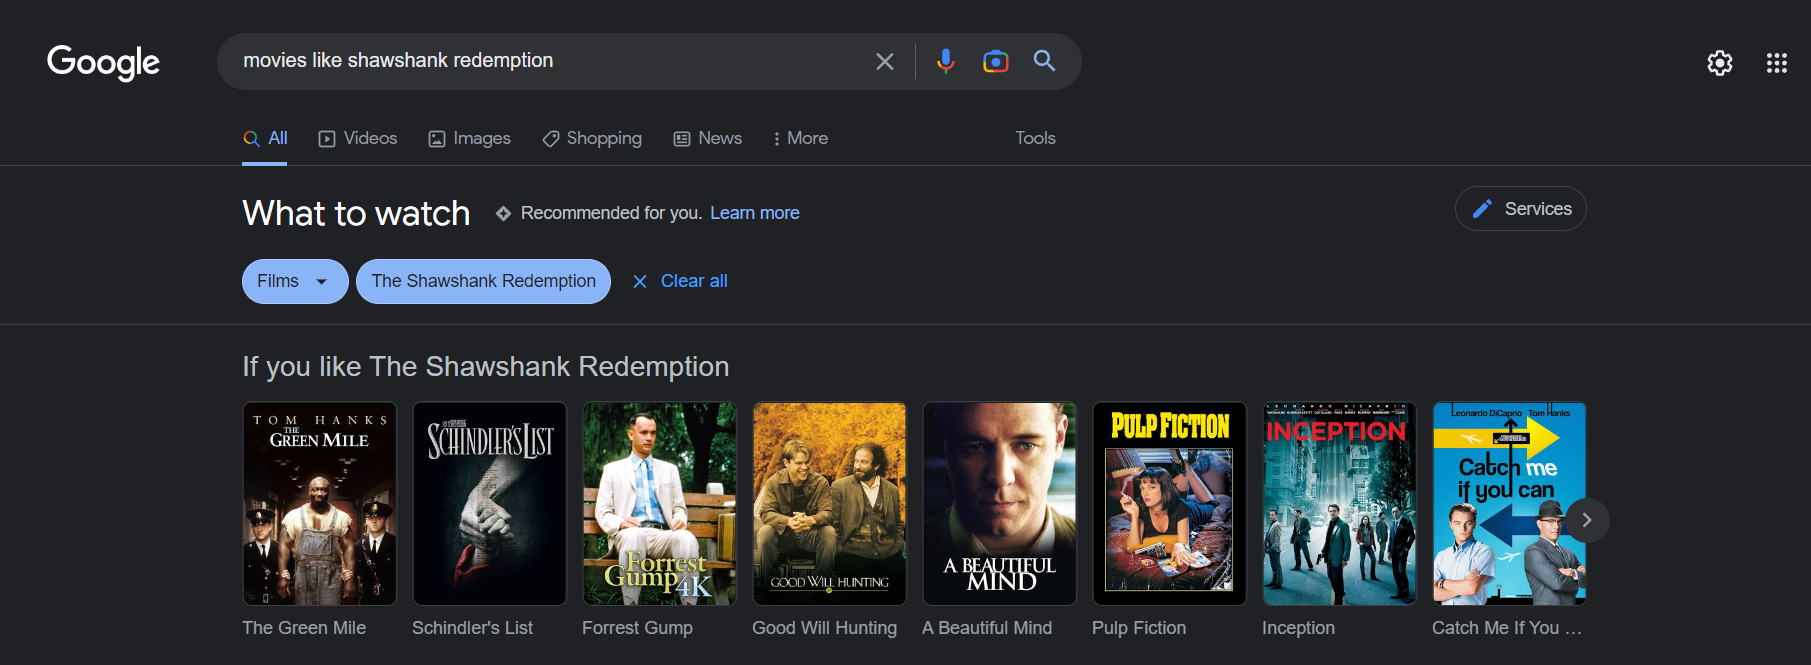

Insights:

- As we can see, 4 movies that our Pearson Correlation based Rec Sys recommended, out of which, 3 movies are recommended by Google also, which tells our simple approach is decent

### User-based Approach

Using the user-based approach to create a recommender system based on Pearson Correlation

In [80]:
tab_transpose = tab.T

In [81]:
tab_transpose

UserID,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Night Mother,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"'burbs, The",0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...And Justice for All,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zero Effect,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zero Kelvin (Kjærlighetens kjøtere),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [82]:
user_id =input("Enter a user_id : ")
user_id_recomm = tab_transpose[user_id]

Enter a user_id : 1001


In [83]:
similar_movie_user_based = tab_transpose.corrwith(user_id_recomm)


In [84]:
similar_movie_user_based.sort_values(ascending=False).to_frame().rename(columns={0:"Correlation"}).head(10)


,Correlation
UserID,
1001,1.000000
1407,0.361699
5825,0.334978
1173,0.326688
1203,0.326667
1716,0.319368
2047,0.314799
1241,0.309363
3504,0.308861


**Insights**

- As we can see, the users 1407,5825,1173 and 1203 have similar movie interests as our query user-1001, which means, we can recommend movies liked by user 1001 to other 4 users and there is a good chance they like them (although the correlation is a bit low - 0.36)

## Build a Recommender System based on Cosine Similarity and K - Nearest Neighbors

### Item-Item Similarity matrix

In [85]:
from sklearn.metrics.pairwise import cosine_similarity
item_sim = cosine_similarity(tab.T) # row based and hence for getting moview (items) entries in rows, we are transposing
item_sim

array([[1.        , 0.07235746, 0.03701053, ..., 0.        , 0.12024178,
        0.02700277],
       [0.07235746, 1.        , 0.11528952, ..., 0.        , 0.        ,
        0.07780705],
       [0.03701053, 0.11528952, 1.        , ..., 0.        , 0.04752635,
        0.0632837 ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.04564448],
       [0.12024178, 0.        , 0.04752635, ..., 0.        , 1.        ,
        0.04433508],
       [0.02700277, 0.07780705, 0.0632837 , ..., 0.04564448, 0.04433508,
        1.        ]])

In [86]:
item_sim_mat = pd.DataFrame(item_sim,index=tab.columns,columns = tab.columns)
item_sim_mat

Title,"$1,000,000 Duck",'Night Mother,'Til There Was You,"'burbs, The",...And Justice for All,1-900,10 Things I Hate About You,101 Dalmatians,12 Angry Men,"13th Warrior, The",...,"Young Poisoner's Handbook, The",Young Sherlock Holmes,Young and Innocent,Your Friends and Neighbors,Zachariah,"Zed & Two Noughts, A",Zero Effect,Zero Kelvin (Kjærlighetens kjøtere),Zeus and Roxanne,eXistenZ
Title,,,,,,,,,,,,,,,,,,,,,
"$1,000,000 Duck",1.000000,0.072357,0.037011,0.079291,0.060838,0.000000,0.058619,0.189843,0.094785,0.058418,...,0.038725,0.076474,0.000000,0.044074,0.0,0.045280,0.039395,0.000000,0.120242,0.027003
'Night Mother,0.072357,1.000000,0.115290,0.115545,0.159526,0.000000,0.076798,0.137135,0.111413,0.046135,...,0.053010,0.087828,0.063758,0.135962,0.0,0.091150,0.074787,0.000000,0.000000,0.077807
'Til There Was You,0.037011,0.115290,1.000000,0.098756,0.066301,0.080250,0.127895,0.128523,0.079115,0.066598,...,0.029200,0.062893,0.000000,0.079187,0.0,0.022594,0.079261,0.000000,0.047526,0.063284
"'burbs, The",0.079291,0.115545,0.098756,1.000000,0.143620,0.000000,0.192191,0.250140,0.170719,0.197808,...,0.113386,0.207897,0.019962,0.138064,0.0,0.055704,0.161174,0.000000,0.033567,0.110525
...And Justice for All,0.060838,0.159526,0.066301,0.143620,1.000000,0.000000,0.075093,0.178928,0.205486,0.122431,...,0.089998,0.153006,0.067009,0.109029,0.0,0.086080,0.110867,0.074317,0.000000,0.111040
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"Zed & Two Noughts, A",0.045280,0.091150,0.022594,0.055704,0.086080,0.000000,0.012702,0.042295,0.039344,0.041324,...,0.047282,0.073996,0.070409,0.141537,0.0,1.000000,0.084020,0.124939,0.000000,0.137372
Zero Effect,0.039395,0.074787,0.079261,0.161174,0.110867,0.000000,0.175771,0.157313,0.133061,0.156505,...,0.179315,0.169677,0.021362,0.206870,0.0,0.084020,1.000000,0.059228,0.016838,0.242043
Zero Kelvin (Kjærlighetens kjøtere),0.000000,0.000000,0.000000,0.000000,0.074317,0.000000,0.000000,0.033120,0.036867,0.034797,...,0.048440,0.046892,0.000000,0.000000,0.0,0.124939,0.059228,1.000000,0.000000,0.045644


### User-user Similarity matrix

In [87]:
user_sim = cosine_similarity(tab)
user_sim

array([[1.        , 0.25531859, 0.12396703, ..., 0.15926709, 0.11935626,
        0.12239079],
       [0.25531859, 1.        , 0.25964457, ..., 0.16569953, 0.13332665,
        0.24845029],
       [0.12396703, 0.25964457, 1.        , ..., 0.20430203, 0.11352239,
        0.30693676],
       ...,
       [0.15926709, 0.16569953, 0.20430203, ..., 1.        , 0.18657496,
        0.18563871],
       [0.11935626, 0.13332665, 0.11352239, ..., 0.18657496, 1.        ,
        0.10827118],
       [0.12239079, 0.24845029, 0.30693676, ..., 0.18563871, 0.10827118,
        1.        ]])

In [88]:
# User Similarity Matrix:

user_sim_mat = pd.DataFrame(user_sim,index=tab.index,columns = tab.index)
user_sim_mat

UserID,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,990,991,992,993,994,995,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.255319,0.123967,0.207800,0.139317,0.110320,0.121384,0.180073,0.103896,0.052816,...,0.079367,0.038048,0.032136,0.067631,0.070052,0.035731,0.170184,0.159267,0.119356,0.122391
10,0.255319,1.000000,0.259645,0.280479,0.158703,0.112917,0.141985,0.432171,0.194915,0.102487,...,0.154412,0.186234,0.083739,0.125894,0.118558,0.146552,0.304806,0.165700,0.133327,0.248450
100,0.123967,0.259645,1.000000,0.306067,0.075736,0.110450,0.358686,0.237292,0.172872,0.099147,...,0.098235,0.097953,0.065152,0.178664,0.271311,0.033754,0.344290,0.204302,0.113522,0.306937
1000,0.207800,0.280479,0.306067,1.000000,0.099117,0.047677,0.201722,0.355619,0.325966,0.130702,...,0.170100,0.076779,0.000000,0.200343,0.380741,0.044404,0.330748,0.172803,0.098456,0.250564
1001,0.139317,0.158703,0.075736,0.099117,1.000000,0.164854,0.053887,0.150069,0.138602,0.134710,...,0.146270,0.026891,0.097011,0.119609,0.092234,0.109700,0.222119,0.103255,0.269952,0.178399
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.035731,0.146552,0.033754,0.044404,0.109700,0.072578,0.031406,0.088763,0.061450,0.032265,...,0.080559,0.252222,0.074207,0.098705,0.048650,1.000000,0.063925,0.019459,0.075830,0.052571
996,0.170184,0.304806,0.344290,0.330748,0.222119,0.224779,0.185226,0.351716,0.287965,0.164045,...,0.205186,0.086546,0.062523,0.186441,0.217672,0.063925,1.000000,0.179404,0.178834,0.418466
997,0.159267,0.165700,0.204302,0.172803,0.103255,0.068980,0.170771,0.175340,0.106303,0.049536,...,0.192642,0.030588,0.081380,0.162615,0.110656,0.019459,0.179404,1.000000,0.186575,0.185639


In [89]:
from scipy.sparse import csr_matrix
csr_mat = csr_matrix(tab.T.values)

In [90]:
csr_mat

<3651x6040 sparse matrix of type '<class 'numpy.float64'>'
	with 994516 stored elements in Compressed Sparse Row format>

## KNN based Recommender System

In [91]:
from sklearn.neighbors import NearestNeighbors
knn = NearestNeighbors(n_neighbors= 5,metric = 'cosine', n_jobs=-1)
knn.fit(csr_mat)

NearestNeighbors(metric='cosine', n_jobs=-1)

In [92]:
movie_name = 'Shawshank Redemption, The'
distances,indices = knn.kneighbors(tab[movie_name].values.reshape(1,-1),n_neighbors=10)
len(distances.flatten()) # prints the number of neighbors

10

In [93]:
movie_name = 'Shawshank Redemption, The'
distances, indices = knn.kneighbors(tab[movie_name].values.reshape(1,-1),n_neighbors=10)
for i in range (0, len(distances.flatten())):
    if i == 0 :
        print("The movies close similar to",movie_name,"are \n")
    else:
        print(tab.columns[indices.flatten()[i]],"with a distance of",round(distances.flatten()[i],3))

The movies close similar to Shawshank Redemption, The are 

Silence of the Lambs, The with a distance of 0.319
Pulp Fiction with a distance of 0.341
Fargo with a distance of 0.344
Schindler's List with a distance of 0.345
Good Will Hunting with a distance of 0.368
Saving Private Ryan with a distance of 0.385
GoodFellas with a distance of 0.395
American Beauty with a distance of 0.405
Usual Suspects, The with a distance of 0.408


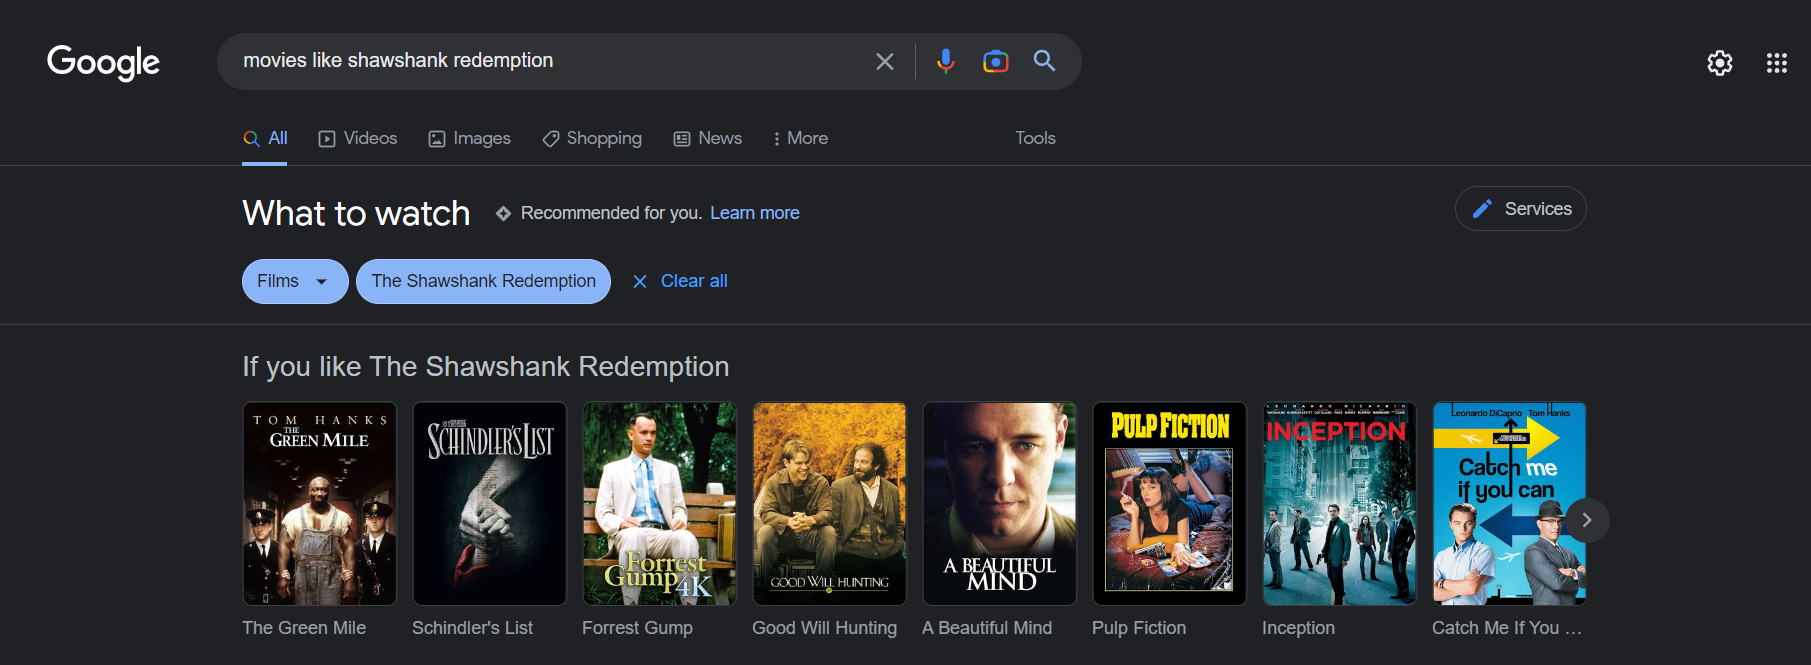

**Insights**

- KNN based recommender System also showed same movies as Pearson correlation, of which 3 are also showed by Google

#### 6. Name the top 3 movies similar to ‘Liar Liar’ on the item-based approach.

In [94]:
movie_name = 'Liar Liar'
distances, indices = knn.kneighbors(tab[movie_name].values.reshape(1,-1),n_neighbors=4)
for i in range (0, len(distances.flatten())):
    if i == 0 :
        print("The movies close similar to",movie_name,"are \n")
    else:
        print(tab.columns[indices.flatten()[i]],"with a distance of",round(distances.flatten()[i],3))

The movies close similar to Liar Liar are 

Mrs. Doubtfire with a distance of 0.443
Ace Ventura: Pet Detective with a distance of 0.483
Dumb & Dumber with a distance of 0.487


## Movie Recommendation based on matrix Factorization

In [95]:
from cmfrec import CMF

In [96]:
# For CMF, we need only UserID, MovieID and the Rating

data = df[['UserID','MovieID','Rating']].copy()

In [97]:
# Change the column name from MovieID to ItemID as required by the library
data.columns = ['UserId','ItemId','Rating']

In [98]:
data.head()

,UserId,ItemId,Rating
0,1,1,5
1,1,48,5
2,1,150,5
3,1,260,4
4,1,527,5


In [99]:
# Initialise the CMF with d = 4
model = CMF(k=4,item_bias = False, user_bias = False,verbose=False)

# Fit the model to the data
model.fit(data)

Collective matrix factorization model
(explicit-feedback variant)


In [100]:
#User Embeddings
print(f'Number of Users: {model.A_.shape}')
model.A_

Number of Users: (6040, 4)


array([[ 0.42385334, -0.17669806,  0.0223275 , -0.11155422],
       [ 0.40189075,  0.28910863, -0.03830721, -0.28542688],
       [ 0.12293915, -0.47341514, -0.3112484 ,  0.35614476],
       ...,
       [ 0.10028142,  0.04651602, -0.17304471,  0.6684995 ],
       [ 0.27882648, -0.76909286,  0.12600802, -0.23556548],
       [ 0.6160736 ,  0.01676589, -0.5721203 ,  0.28885388]],
      dtype=float32)

In [101]:
#Movie Embeddings
print(f'Number of Movies: {model.B_.shape}')
model.B_

Number of Movies: (3693, 4)


array([[ 1.62190068e+00, -3.84901851e-01, -3.51408035e-01,
         9.91071314e-02],
       [ 3.35039884e-01,  1.19478546e-01,  7.63655603e-01,
        -1.06735706e+00],
       [ 1.41989207e+00, -4.63952363e-01, -5.70565104e-01,
        -3.03429425e-01],
       ...,
       [ 8.18001106e-03, -4.41447861e-04, -9.25910287e-03,
        -3.89051362e-04],
       [-2.22689249e-02,  1.46824413e-03,  1.25473160e-02,
        -5.25189564e-03],
       [ 6.24099327e-03, -6.91417023e-04, -9.46218707e-03,
         3.72565351e-04]], dtype=float32)

In [102]:
# Global mean of ratings
model.glob_mean_

3.5797290802001953

In [103]:
# top N items for any user
top_items = model.topN(user = 1001, n = 10)
top_items # prints indexes of recommended movies

array(['1198', '318', '260', '527', '2762', '2028', '1196', '858', '1234',
       '953'], dtype=object)

In [104]:
movies.loc[movies.MovieID.isin(top_items)]

,MovieID,Title,Genres
257,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantas
315,318,"Shawshank Redemption, The (1994)",Drama
523,527,Schindler's List (1993),Drama|War
847,858,"Godfather, The (1972)",Action|Crime|Drama
941,953,It's a Wonderful Life (1946),Drama
1178,1196,Star Wars: Episode V - The Empire Strikes Back...,Action|Adv
1180,1198,Raiders of the Lost Ark (1981),Action|Adventure
1215,1234,"Sting, The (1973)",Comedy|Crime
1959,2028,Saving Private Ryan (1998),Action|Drama|War
2693,2762,"Sixth Sense, The (1999)",Thriller


In [105]:
# top 10 movies recommended to User = 1001 based on CMF 

movies.loc[movies.Title.isin(top_items)]

,MovieID,Title,Genres


In [106]:
# Create a Dataframe for embeddings 

user = model.A_
item = model.B_
mean = model.glob_mean_
matrix = np.dot(user,item.T) + mean

In [107]:
matrix.shape 

(6040, 3693)

In [108]:
user_item_embedding  = pd.DataFrame(matrix , index = tab.index,columns = df.MovieID.unique() )
user_item_embedding

,1,48,150,260,527,531,588,594,595,608,...,872,2480,3656,3172,989,3280,642,1915,3779,1832
UserID,,,,,,,,,,,,,,,,,,,,,
1,4.316287,3.836744,4.284644,4.245519,4.255650,4.070672,4.253226,4.162325,4.334282,3.834262,...,3.580188,3.583756,3.592458,3.598915,3.578113,3.560829,3.577709,3.583111,3.570897,3.582244
10,4.105451,4.024320,4.124701,3.809097,3.851266,3.917781,4.194238,4.111456,4.340503,3.112635,...,3.586080,3.572981,3.548256,3.571855,3.564389,3.562459,3.584661,3.583355,3.572222,3.582294
100,4.106014,2.946536,4.043454,4.674064,4.581241,3.626481,3.728285,3.599582,3.648984,4.565741,...,3.566711,3.569215,3.617380,3.623271,3.607858,3.535652,3.564708,3.583687,3.570520,3.583901
1000,3.963053,2.843795,3.898789,4.464503,4.405694,3.429501,3.608305,3.507264,3.582279,4.140695,...,3.566886,3.559752,3.584464,3.606849,3.604949,3.524844,3.565499,3.584723,3.569639,3.584936
1001,4.658257,4.083477,4.609916,4.436555,4.477891,4.349298,4.620188,4.509849,4.771106,3.802005,...,3.582379,3.588836,3.592460,3.601994,3.572529,3.556586,3.578762,3.584476,3.567090,3.583056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,4.309159,3.373260,4.348934,4.770538,4.621271,3.807389,4.050096,3.781873,3.971882,4.326170,...,3.574535,3.558352,3.606416,3.620711,3.594760,3.539146,3.572319,3.584473,3.569786,3.584188
996,3.930788,3.861033,3.895973,3.926473,3.913260,4.058727,3.909384,3.908852,3.863159,4.317831,...,3.579712,3.605748,3.640646,3.608024,3.582667,3.601560,3.578155,3.577893,3.580353,3.577691
997,3.851534,2.773211,3.596427,4.098922,4.218115,3.593847,3.486102,3.686093,3.551105,4.393456,...,3.561397,3.602655,3.614079,3.606037,3.610246,3.546397,3.559475,3.581871,3.571882,3.582209


### Use the new user_item matrix for recommending based on Pearson Correlation 


In [109]:
# Recommendations based on Movie Name 

# Movie-ID = 318 for Shawshank Redemption

new_rating = user_item_embedding['318']

In [110]:
new_similar_movies = user_item_embedding.corrwith(new_rating)

In [111]:
new_similar_movies.sort_values(ascending=False).to_frame().rename(columns={0:"Correlation"}).head(10)

,Correlation
318,1.000000
1412,0.989608
260,0.988115
1196,0.982879
2324,0.982100
1198,0.970925
2028,0.959599
593,0.957887
2762,0.955392
527,0.931522


In [112]:
# Lets check the movies with above given Movie ID's 

IDs = ['318','1412','260','1196','2324','1198','2028','593','2762','527']
movies[movies.MovieID.isin(IDs)]['Title']

257             Star Wars: Episode IV - A New Hope (1977)
315                      Shawshank Redemption, The (1994)
523                               Schindler's List (1993)
589                      Silence of the Lambs, The (1991)
1178    Star Wars: Episode V - The Empire Strikes Back...
1180                       Raiders of the Lost Ark (1981)
1389                             Some Mother's Son (1996)
1959                           Saving Private Ryan (1998)
2255           Life Is Beautiful (La Vita è bella) (1997)
2693                              Sixth Sense, The (1999)
Name: Title, dtype: object

- From above, we can see that 3 movies were recommended by Pearson Correlation as well as KNN 

  - Schindler's List
  - Silence of the Lambs, The
  - Saving Private Ryan

### Evaluating the Matrix Factorization method

In [113]:
from sklearn.model_selection import train_test_split

users_train, users_test = train_test_split(data.UserId.unique(), test_size=0.2, random_state=1)
items_train, items_test = train_test_split(data.ItemId.unique(), test_size=0.2, random_state=2)

ratings_train, ratings_test1 = train_test_split(data.loc[data.UserId.isin(users_train) &
                                                                  data.ItemId.isin(items_train)],
                                                test_size=0.2, random_state=123
                                               )

users_train = ratings_train.UserId.unique()
items_train = ratings_train.ItemId.unique()

ratings_test1 = ratings_test1.loc[ratings_test1.UserId.isin(users_train) &
                                  ratings_test1.ItemId.isin(items_train)]

In [114]:
metrics_model = CMF(k=4, verbose=False).fit(ratings_train)

In [115]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_percentage_error

pred_ratingsonly = metrics_model.predict(ratings_test1.UserId, ratings_test1.ItemId)
rmse = (np.sqrt(mean_squared_error(ratings_test1.Rating,pred_ratingsonly,squared=True)))
mape = mean_absolute_percentage_error(ratings_test1.Rating,pred_ratingsonly)
print(f"RMSE: {rmse}")
print(f"MAPE: {mape}")

RMSE: 0.8693876829451708
MAPE: 0.26693252712550225


# Questionnaire

**Q1: Users of which age group have watched and rated the most number of movies? - 25-34 age group**

In [116]:
df.groupby('Age')['Rating'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns = {'Rating':'Number of Ratings'})

,Age,Number of Ratings
0,25-34,394707
1,35-44,198446
2,18-24,183172
3,45-49,83329
4,50-55,72223
5,56+,38616
6,Under 18,27147


**Q2: Users belonging to which profession have watched and rated the most movies? - College/grad student**

In [117]:
# TOp 10 occupations of users

df.groupby('Occupation')['Rating'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns = {'Rating':'Number of Ratings'})[:10]

,Occupation,Number of Ratings
0,college/grad student,130743
1,other,130208
2,executive/managerial,105168
3,academic/educator,85078
4,technician/engineer,72646
5,writer,60197
6,programmer,57040
7,artist,49926
8,sales/marketing,49002
9,self-employed,45898


**Q3: Most of the users in our dataset who've rated the movie are Male - TRUE**

In [118]:
df.groupby('Gender')['Rating'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns = {'Rating':'Number of Ratings'})[:10]

,Gender,Number of Ratings
0,M,751679
1,F,245961


**Q4: Most of the movies present in our dataset were released in which decade - 90s**

In [119]:
df.groupby('ReleaseYear')['Rating'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns = {'Rating':'Number of Ratings'})[:10]

,ReleaseYear,Number of Ratings
0,1999,86833
1,1998,68165
2,1997,65402
3,1995,60754
4,1996,59271
5,1994,52963
6,1993,46245
7,2000,41000
8,1992,37866
9,1986,30865


- As we can see above, top 10 release years have 8 years between 1991-2000, so the decade is 1990-2000

**Q5: The movie with maximum number of Ratings is ? - American Beauty**

In [120]:
df.groupby('Title')['Rating'].count().sort_values(ascending=False).to_frame().reset_index().rename(columns = {'Rating':'Number of Ratings'})[:5]

,Title,Number of Ratings
0,American Beauty,3428
1,Star Wars: Episode IV - A New Hope,2991
2,Star Wars: Episode V - The Empire Strikes Back,2990
3,Star Wars: Episode VI - Return of the Jedi,2883
4,Jurassic Park,2672


**Q6: Name top 3 movies similar to Liar Liar on the item based approach**

In [121]:
movie_name = 'Liar Liar'
distances, indices = knn.kneighbors(tab[movie_name].values.reshape(1,-1),n_neighbors=4)
for i in range (0, len(distances.flatten())):
    if i == 0 :
        print("The movies close similar to",movie_name,"are \n")
    else:
        print(tab.columns[indices.flatten()[i]],"with a distance of",round(distances.flatten()[i],3))

The movies close similar to Liar Liar are 

Mrs. Doubtfire with a distance of 0.443
Ace Ventura: Pet Detective with a distance of 0.483
Dumb & Dumber with a distance of 0.487


**Q7.On the basis of approach, Collaborative Filtering methods can be classified into memory-based and model-based.**

  - Memory based colab filtering has user-user and item-item whereas, model-based has Matrix Factorization

**Q8: Pearson Correlation ranges between __ to __ whereas, Cosine Similarity belongs to the interval between to**

  - Pearson Correlation ranges between -1 to +1  
  - Cosine Similarity belongs to the interval between 0 to 1

**Q9 : Mention the RMSE and MAPE that you got while evaluating the Matrix Factorization model.**

  - RMSE: 0.869
  - MAPE: 0.266

**Q10: Give the sparse ‘row’ matrix representation for the following dense matrix - [[1 0] [3 7]]**

    (0,0)1
    (1,0)3
    (1,1)7